In [1]:
import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
files = glob.glob("/tmp/working/dataset/nishika/old_apartment/train/*.csv")

In [3]:
data_list = []
for file in files:
    data_list.append(pd.read_csv(file, index_col=0))

/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df = pd.concat(data_list)

In [5]:
df.shape

(637351, 27)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637351 entries, 1060685 to 47003572
Data columns (total 27 columns):
種類              637351 non-null object
地域              0 non-null float64
市区町村コード         637351 non-null int64
都道府県名           637351 non-null object
市区町村名           637351 non-null object
地区名             637060 non-null object
最寄駅：名称          634732 non-null object
最寄駅：距離（分）       614306 non-null object
間取り             615609 non-null object
面積（㎡）           637351 non-null object
土地の形状           0 non-null float64
間口              0 non-null float64
延床面積（㎡）         0 non-null float64
建築年             619117 non-null object
建物の構造           623423 non-null object
用途              591214 non-null object
今後の利用目的         275091 non-null object
前面道路：方位         0 non-null float64
前面道路：種類         0 non-null float64
前面道路：幅員（ｍ）      0 non-null float64
都市計画            618786 non-null object
建ぺい率（％）         614848 non-null float64
容積率（％）          614848 non-null float64
取引時点       

In [7]:
nonnull_list = []

for col in df.columns:
    nonnull = df[col].count()
    if nonnull == 0:
        nonnull_list.append(col)

nonnull_list

df = df.drop(nonnull_list, axis=1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637351 entries, 1060685 to 47003572
Data columns (total 20 columns):
種類              637351 non-null object
市区町村コード         637351 non-null int64
都道府県名           637351 non-null object
市区町村名           637351 non-null object
地区名             637060 non-null object
最寄駅：名称          634732 non-null object
最寄駅：距離（分）       614306 non-null object
間取り             615609 non-null object
面積（㎡）           637351 non-null object
建築年             619117 non-null object
建物の構造           623423 non-null object
用途              591214 non-null object
今後の利用目的         275091 non-null object
都市計画            618786 non-null object
建ぺい率（％）         614848 non-null float64
容積率（％）          614848 non-null float64
取引時点            637351 non-null object
改装              580431 non-null object
取引の事情等          18275 non-null object
取引価格（総額）_log    637351 non-null float64
dtypes: float64(3), int64(1), object(16)
memory usage: 102.1+ MB


In [9]:
df["市区町村名"].value_counts()
# 市区町村名

大田区        12269
江東区        11591
世田谷区       10747
港区         10580
新宿区        10055
品川区         9138
板橋区         8532
中央区         8349
練馬区         7800
杉並区         6986
足立区         6674
文京区         6670
福岡市中央区      6507
渋谷区         6353
豊島区         6294
墨田区         6164
札幌市中央区      5776
船橋市         5429
台東区         5405
川口市         5182
横浜市港北区      5123
福岡市博多区      4980
江戸川区        4755
大阪市中央区      4652
西宮市         4643
横浜市中区       4470
葛飾区         4469
目黒区         4436
大阪市北区       4428
八王子市        4366
           ...  
岡山市東区          4
安芸郡海田町         4
遠賀郡芦屋町         3
高山市            3
中間市            3
筑後市            3
三重郡朝日町         3
吉野郡吉野町         2
日高市            2
宮城郡松島町         2
筑西市            2
丹羽郡大口町         2
美濃加茂市          2
宮城郡七ヶ浜町        2
名取市            2
瑞浪市            2
柳川市            2
可児市            2
榛原郡川根本町        2
粕屋郡宇美町         1
粕屋郡新宮町         1
行橋市            1
新潟市西蒲区         1
羽島郡岐南町         1
堺市美原区          1
安芸郡坂町          1
淡路市            1
刈田郡蔵王町        

In [10]:
df = df.drop("市区町村名", axis=1)

In [11]:
df.describe()

,市区町村コード,建ぺい率（％）,容積率（％）,取引価格（総額）_log
count,637351.000000,614848.000000,614848.000000,637351.000000
mean,18513.985300,67.601944,301.601876,7.217424
std,9596.722442,10.402295,148.105400,0.353935
min,1101.000000,30.000000,50.000000,2.653213
25%,13106.000000,60.000000,200.000000,7.000000
50%,14104.000000,60.000000,200.000000,7.255273
75%,27114.000000,80.000000,400.000000,7.447158
max,47213.000000,80.000000,1300.000000,9.934498


In [12]:
df.astype("str").describe()

,種類,市区町村コード,都道府県名,地区名,最寄駅：名称,最寄駅：距離（分）,間取り,面積（㎡）,建築年,建物の構造,用途,今後の利用目的,都市計画,建ぺい率（％）,容積率（％）,取引時点,改装,取引の事情等,取引価格（総額）_log
count,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351,637351
unique,1,618,47,12047,3832,35,64,114,77,13,23,5,17,7,18,58,3,10,380
top,中古マンション等,13111,東京都,本町,nan,6,３ＬＤＫ,70,平成3年,ＲＣ,住宅,nan,商業地域,60.0,200.0,2014年第１四半期,未改装,nan,7.176091259055681
freq,637351,12269,190524,5267,2619,50928,272449,83443,21982,431050,583722,362260,172628,349347,293388,13561,419268,619076,20996


In [13]:
df["種類"].value_counts()

中古マンション等    637351
Name: 種類, dtype: int64

In [14]:
df = df.drop("種類", axis=1)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637351 entries, 1060685 to 47003572
Data columns (total 18 columns):
市区町村コード         637351 non-null int64
都道府県名           637351 non-null object
地区名             637060 non-null object
最寄駅：名称          634732 non-null object
最寄駅：距離（分）       614306 non-null object
間取り             615609 non-null object
面積（㎡）           637351 non-null object
建築年             619117 non-null object
建物の構造           623423 non-null object
用途              591214 non-null object
今後の利用目的         275091 non-null object
都市計画            618786 non-null object
建ぺい率（％）         614848 non-null float64
容積率（％）          614848 non-null float64
取引時点            637351 non-null object
改装              580431 non-null object
取引の事情等          18275 non-null object
取引価格（総額）_log    637351 non-null float64
dtypes: float64(3), int64(1), object(14)
memory usage: 92.4+ MB


In [16]:
pd.set_option("display.max_rows", 500)
df["最寄駅：距離（分）"].value_counts()

6          50928
4          48883
5          45337
8          44277
3          42880
9          38379
7          32369
30分?60分    31999
10         31572
11         30625
2          27100
13         22934
1          19746
14         18759
15         18552
12         15068
16         14354
18         11651
19         10533
20          8910
21          7163
23          6663
25          6169
24          4884
28          4133
26          3996
0           3704
1H?1H30     3624
29          3587
17          2515
22          1082
2H?          826
1H30?2H      692
27           412
Name: 最寄駅：距離（分）, dtype: int64

In [17]:
df_temp = df["最寄駅：距離（分）"].replace("1H?1H30", 75)

In [18]:
dis ={
    "30分?60分":45,
    "1H?1H30":75,
    "2H?":120,
    "1H30?2H":105,
}

In [19]:
df["最寄駅：距離（分）"] = df["最寄駅：距離（分）"].replace(dis).astype(float)

In [20]:
df["面積（㎡）"] = df["面積（㎡）"].replace("2000㎡以上", 2000).astype(float)

In [21]:
df["面積（㎡）"].value_counts()

70.0      83443
65.0      78289
60.0      63257
75.0      56644
20.0      52028
55.0      47184
80.0      39572
50.0      33077
15.0      30853
25.0      24495
85.0      24134
45.0      20661
90.0      15374
40.0      15006
30.0      12428
35.0      11656
95.0      11008
100.0      5426
105.0      3175
110.0      2019
115.0      1484
10.0       1313
120.0       999
125.0       724
130.0       546
135.0       398
145.0       287
140.0       276
150.0       189
155.0       167
160.0       129
180.0       104
170.0        98
165.0        93
185.0        69
190.0        69
175.0        56
210.0        55
200.0        47
230.0        45
195.0        44
220.0        36
250.0        26
240.0        24
260.0        24
270.0        23
290.0        21
340.0        13
320.0        12
310.0        12
330.0        11
390.0        11
360.0        10
450.0         9
370.0         9
350.0         8
480.0         8
300.0         8
440.0         8
280.0         8
2000.0        7
460.0         6
500.0   

In [22]:
df["建築年"].value_counts().keys()[0].split("平成")[1].split("年")[0]

'3'

In [23]:
y_list = {}
for i in  df["建築年"].value_counts().keys():
    if "平成" in i:
        num = i.split("平成")[1].split("年")[0]
        year = 33 - int(num)
    if "令和" in i:
        num = i.split("令和")[1].split("年")[0]
        year = 3 - int(num)
    if "昭和" in i:
        num = i.split("昭和")[1].split("年")[0]
        year = 96 - int(num)
    y_list[i] = year

df["建築年"] = df["建築年"].replace(y_list)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637351 entries, 1060685 to 47003572
Data columns (total 18 columns):
市区町村コード         637351 non-null int64
都道府県名           637351 non-null object
地区名             637060 non-null object
最寄駅：名称          634732 non-null object
最寄駅：距離（分）       614306 non-null float64
間取り             615609 non-null object
面積（㎡）           637351 non-null float64
建築年             619117 non-null float64
建物の構造           623423 non-null object
用途              591214 non-null object
今後の利用目的         275091 non-null object
都市計画            618786 non-null object
建ぺい率（％）         614848 non-null float64
容積率（％）          614848 non-null float64
取引時点            637351 non-null object
改装              580431 non-null object
取引の事情等          18275 non-null object
取引価格（総額）_log    637351 non-null float64
dtypes: float64(6), int64(1), object(11)
memory usage: 92.4+ MB


In [25]:
df["取引時点"]

ID
1060685     2009年第４四半期
1005580     2018年第３四半期
1001363     2010年第２四半期
1052374     2015年第３四半期
1059107     2012年第４四半期
1006085     2017年第１四半期
1007458     2010年第３四半期
1017755     2006年第２四半期
1024255     2010年第４四半期
1009499     2019年第１四半期
1059405     2014年第３四半期
1029879     2006年第２四半期
1001610     2019年第３四半期
1049019     2008年第３四半期
1032259     2013年第１四半期
1138124     2008年第２四半期
1003778     2010年第４四半期
1015365     2007年第４四半期
1034083     2009年第４四半期
1011843     2015年第２四半期
1051619     2008年第３四半期
1044276     2011年第３四半期
1001725     2019年第１四半期
1007688     2008年第２四半期
1032849     2009年第３四半期
1119636     2010年第３四半期
1015423     2006年第２四半期
1038541     2016年第３四半期
1037318     2018年第１四半期
1018607     2008年第２四半期
1066715     2008年第３四半期
1039125     2015年第１四半期
1001204     2007年第３四半期
1040925     2014年第３四半期
1033577     2013年第３四半期
1033458     2017年第２四半期
1073771     2019年第１四半期
1070010     2012年第３四半期
1036952     2014年第３四半期
1043696     2008年第１四半期
1005996     2008年第４四半期
1010632     2018年第２四半期
1010258     2015年第４四半期
1069968 

In [26]:
year = {
    "年第１四半期":".25",
    "年第２四半期":".50",
    "年第３四半期":".75",
    "年第４四半期":".99"
}

year_list = {}
for i in df["取引時点"].value_counts().keys():
    for k, j in year.items():
        if k in i:
            year_rep = i.replace(k, j)

    year_list[i] = year_rep

df["取引時点"] = df["取引時点"].replace(year_list).astype(float)

In [27]:
df["取引時点"].value_counts()

2014.25    13561
2017.25    13248
2015.25    13237
2013.25    13233
2013.50    13221
2018.25    13190
2016.25    13099
2019.50    13047
2016.50    13044
2019.25    12975
2010.99    12867
2019.75    12831
2015.50    12808
2018.99    12731
2011.25    12675
2017.99    12600
2015.99    12551
2018.50    12531
2015.75    12485
2016.75    12470
2017.75    12458
2010.75    12457
2013.99    12412
2016.99    12389
2014.99    12187
2013.75    12173
2019.99    12077
2018.75    11995
2010.25    11984
2017.50    11806
2012.99    11753
2012.25    11666
2014.75    11661
2010.50    11596
2014.50    11499
2009.99    11488
2012.50    11115
2009.75    10983
2012.75    10946
2011.99    10934
2009.50    10883
2011.75    10779
2009.25    10605
2011.50    10506
2008.75     9962
2008.99     9947
2008.50     9873
2008.25     9541
2007.99     9304
2007.50     9144
2007.75     8914
2007.25     6174
2006.99     5613
2006.75     5395
2006.50     5221
2006.25     4322
2005.99     3650
2005.75     3535
Name: 取引時点, dt

In [28]:
df.describe()

,市区町村コード,最寄駅：距離（分）,面積（㎡）,建築年,建ぺい率（％）,容積率（％）,取引時点,取引価格（総額）_log
count,637351.000000,614306.000000,637351.000000,619117.000000,614848.000000,614848.000000,637351.000000,637351.000000
mean,18513.985300,11.731487,58.663570,25.959221,67.601944,301.601876,2013.633153,7.217424
std,9596.722442,12.197090,26.712019,11.431670,10.402295,148.105400,3.884546,0.353935
min,1101.000000,0.000000,10.000000,1.000000,30.000000,50.000000,2005.750000,2.653213
25%,13106.000000,5.000000,45.000000,17.000000,60.000000,200.000000,2010.500000,7.000000
50%,14104.000000,8.000000,65.000000,25.000000,60.000000,200.000000,2013.750000,7.255273
75%,27114.000000,14.000000,75.000000,34.000000,80.000000,400.000000,2016.990000,7.447158
max,47213.000000,120.000000,2000.000000,75.000000,80.000000,1300.000000,2019.990000,9.934498


/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


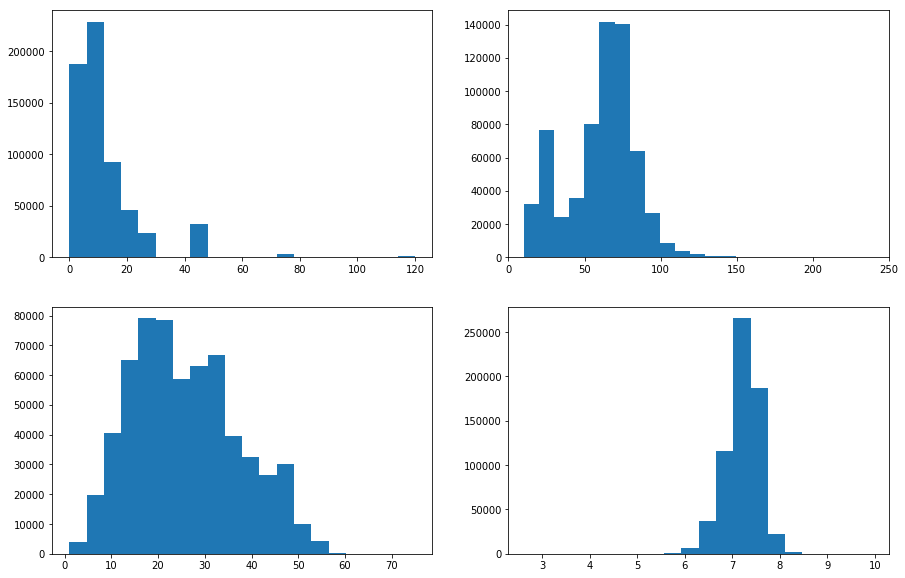

In [37]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes[0][0].hist(df["最寄駅：距離（分）"], bins=20)
axes[0][1].hist(df["面積（㎡）"], bins=200)
axes[0][1].set_xlim(0,250)
axes[1][0].hist(df["建築年"], bins=20)
axes[1][1].hist(df["取引価格（総額）_log"], bins=20)
plt.show()

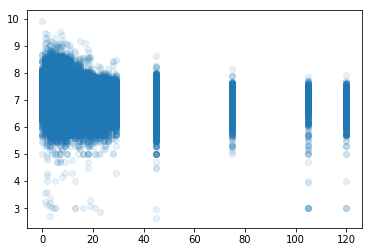

In [39]:
plt.scatter(df["最寄駅：距離（分）"], df["取引価格（総額）_log"], alpha=0.1)

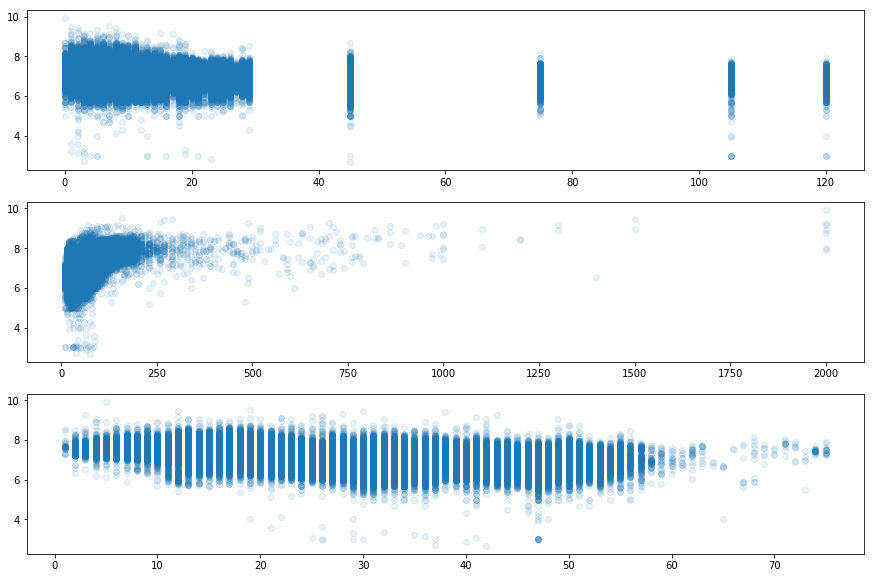

In [44]:
fig, axes = plt.subplots(3, 1, figsize=(15, 10))
axes[0].scatter(df["最寄駅：距離（分）"], df["取引価格（総額）_log"], alpha=0.1)
axes[1].scatter(df["面積（㎡）"], df["取引価格（総額）_log"], alpha=0.1)
axes[2].scatter(df["建築年"], df["取引価格（総額）_log"], alpha=0.1)
plt.show()

In [48]:
df[["取引価格（総額）_log", "最寄駅：距離（分）", "面積（㎡）", "建築年"]].corr()

,取引価格（総額）_log,最寄駅：距離（分）,面積（㎡）,建築年
取引価格（総額）_log,1.000000,-0.215520,0.382755,-0.541508
最寄駅：距離（分）,-0.215520,1.000000,0.151880,0.118339
面積（㎡）,0.382755,0.151880,1.000000,-0.067965
建築年,-0.541508,0.118339,-0.067965,1.000000


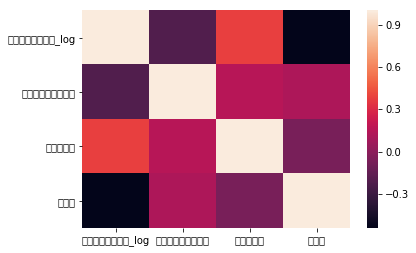

In [50]:
import matplotlib
matplotlib.rcParams["font.family"] = "AppleGothic"
sns.heatmap(df[["取引価格（総額）_log", "最寄駅：距離（分）", "面積（㎡）", "建築年"]].corr())

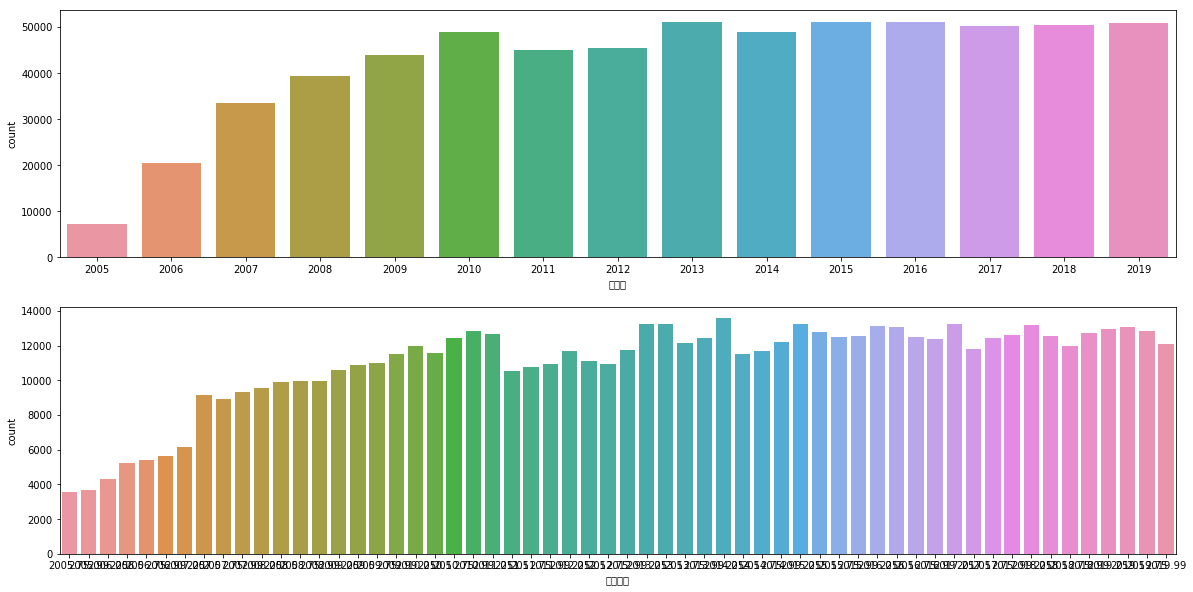

In [59]:
fig, axes = plt.subplots(2, 1, figsize=(20, 10))
df["取引年"] = df["取引時点"].apply(lambda x: str(x)[:4])

sns.countplot(x="取引年", data=df.sort_values("取引年"), ax=axes[0])
sns.countplot(x="取引時点", data=df, ax=axes[1])
